## Cálculo Numérico - Exercícios Propostos - Sistemas Lineares 
Maitê Luisa da Silva

In [1]:
from numpy import array, zeros
from IPython.display import display, Image
import numpy as np

1. Determine o valor da corrente no resistor R3, sabendo que V1 = V2 = 100V e R1 = R2 = 10ohm.

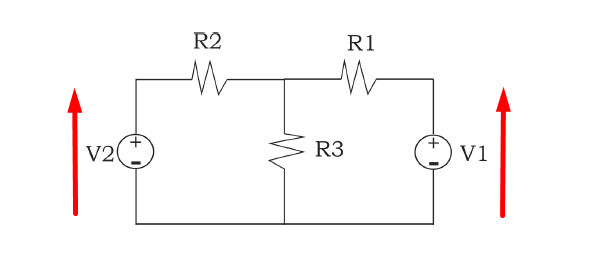

In [2]:
display(Image(filename='circuito.PNG'))

Arbitrando as correntes conforme a imagem acima e aplicando a lei das tensões de Kirchhoff, chega-se na equação abaixo:

                                            -100 + R2*I2 + R3*(I2 + I1) = O
                                            -100 + R1*I1 + R3*(I2 + I1) = O
                                         
                                                 20*I1 + 10*I2 = 100
                                                 10*I1 + 20*I2 = 100

In [3]:
def LU_Decomposition_method(A, b):  # cria-se a função do método
    m = len(A)
    y = np.zeros(m)
    x = np.zeros(m)
    U = A
    L = np.zeros([m, m])
    for k in range(0, m):
        for r in range(0, m):
            if (k == r):
                L[k, r] = 1
            if (k < r):
                factor = (A[r, k]/A[k, k])
                L[r, k] = factor
                for c in range(0, m):
                    U[r, c] = A[r, c] - (factor * A[k, c])
    A = np.zeros([m, m])
    for r in range(0, m):
        for c in range(0, m):
            for k in range(0, m):
                A[r, c] += (L[r, k] * U[k, c])
    print('A')
    print(A)
    print('L')
    print(L)
    print()
    print('U')
    print(U)
    # RESOLUÇÃO DAS EQUAÇÕES MATRICIAIS
    ###################################
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(U, y)
    ###################################
    f = 'SOLUÇÃO DO SISTEMA'
    print('-'*(len(f)+32))
    print(f'{f:^50}')
    print('-'*(len(f)+32))
    print('x =')
    print(x)
    print('Onde: ')
    for c in range(0, len(x)):
        print(f'\t x[{c}] = {x[c]} \n')
    return x

In [4]:
A = array([[20,10],[10,20]])
b = np.transpose([100,100])
Res=LU_Decomposition_method(A,b)
I3 = Res[0] + Res[1]
print('Corrente no Resistor R3:')
print(I3)

A
[[20. 10.]
 [10. 20.]]
L
[[1.  0. ]
 [0.5 1. ]]

U
[[20 10]
 [ 0 15]]
--------------------------------------------------
                SOLUÇÃO DO SISTEMA                
--------------------------------------------------
x =
[3.33333333 3.33333333]
Onde: 
	 x[0] = 3.3333333333333335 

	 x[1] = 3.3333333333333335 

Corrente no Resistor R3:
6.666666666666667


2. Calcule as tensões nos nós tendo por referência o nó 5. O circuito pode ser equacionado da seguinte maneira [2]:


                                                   {I}=[Y]{V}

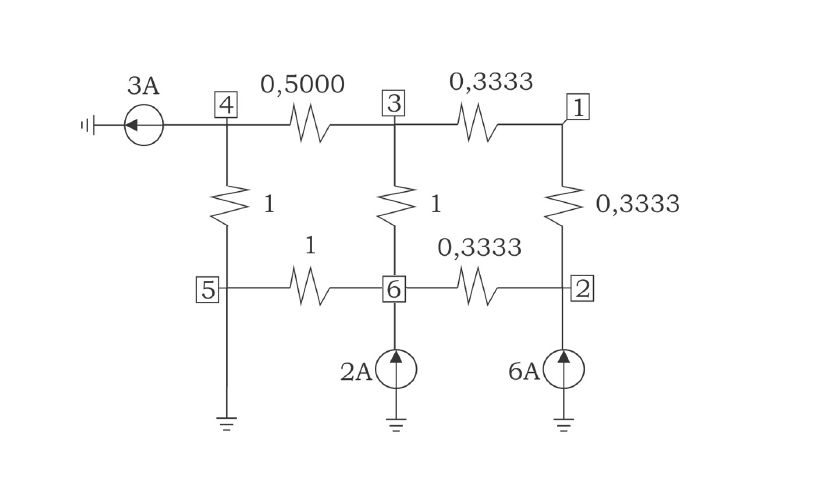

In [5]:
display(Image(filename='circuito2.PNG'))

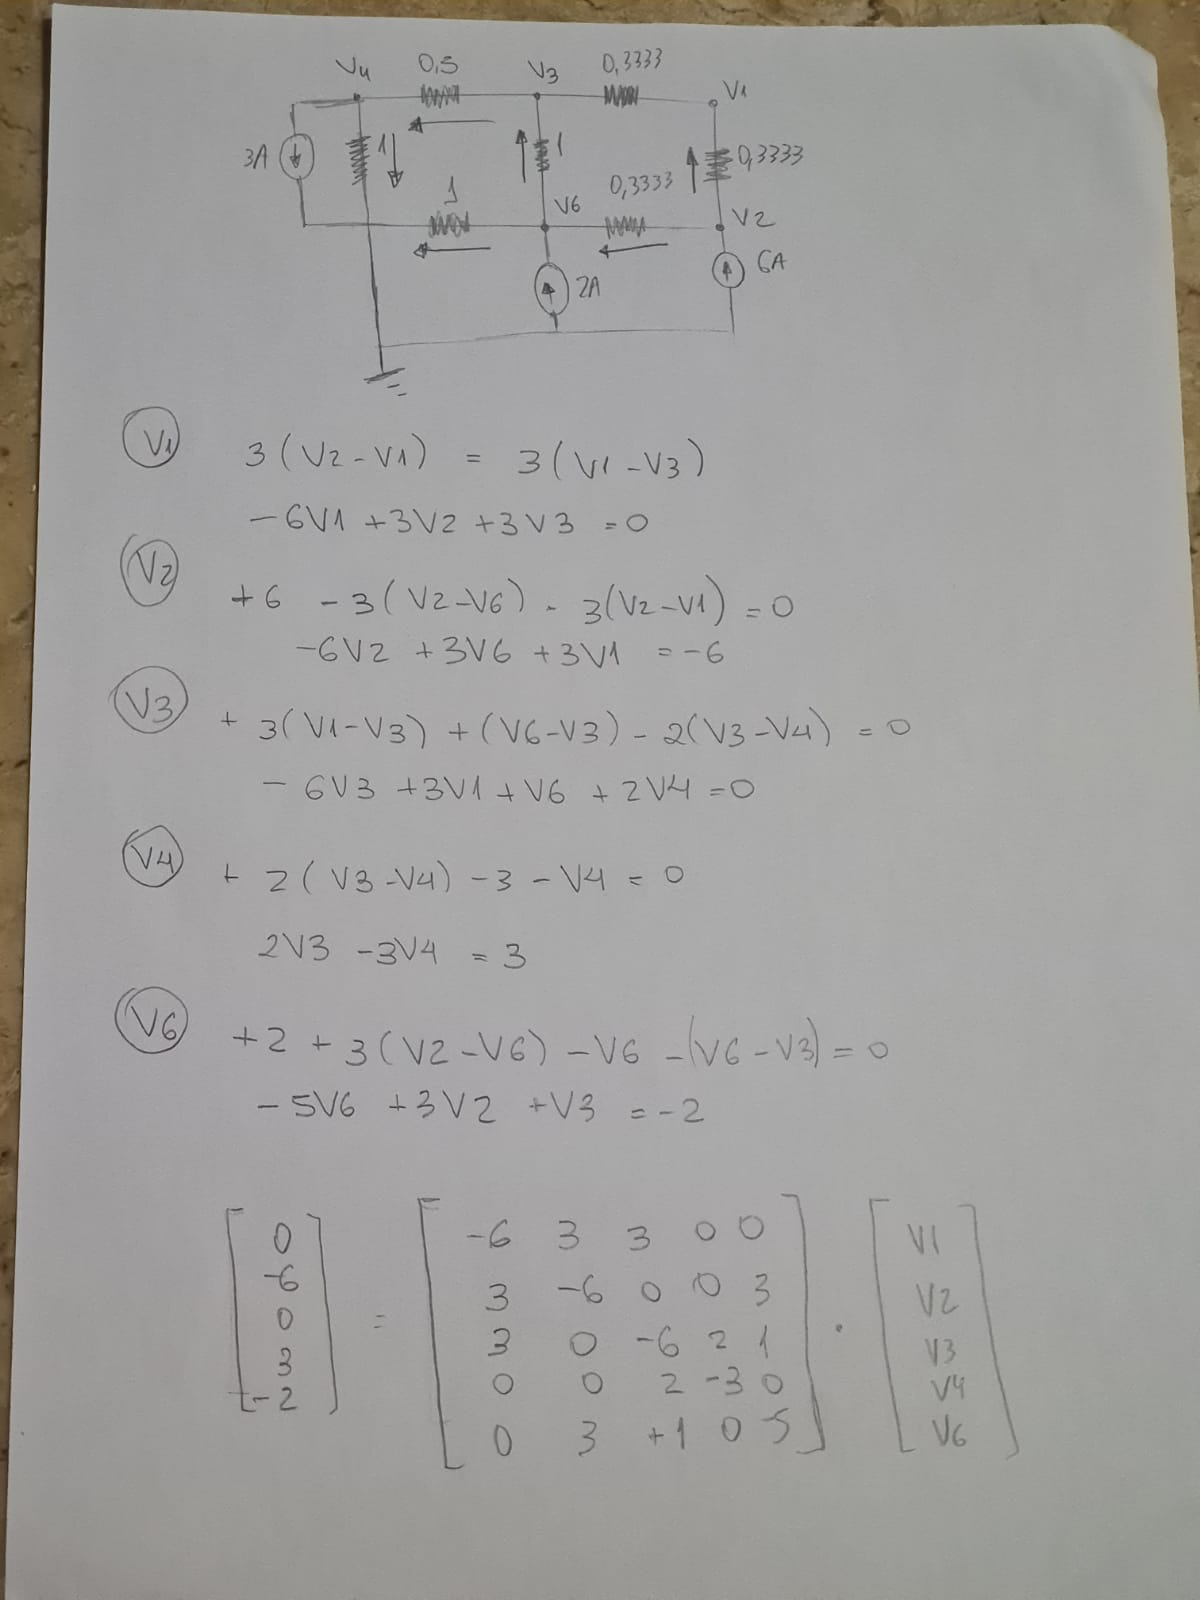

In [6]:
display(Image(filename='equacionamento.PNG'))

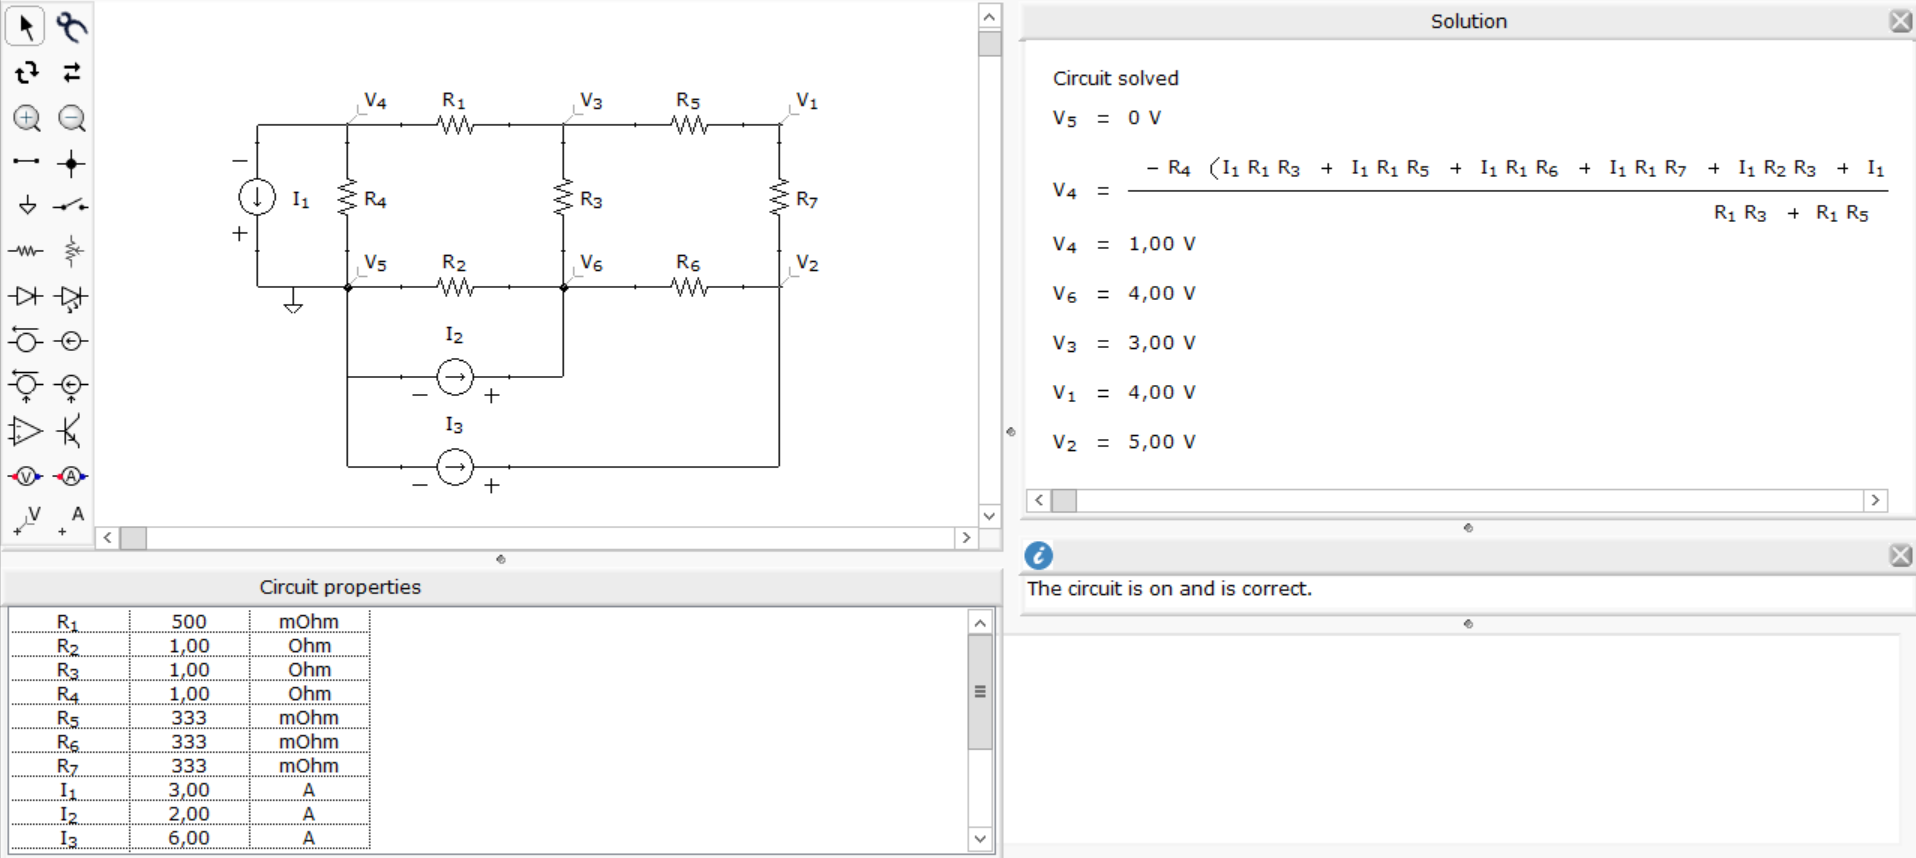

In [7]:
display(Image(filename='simulacao.PNG'))

In [8]:
def GaussEliminação(A, b):  # cria-se a função do método
    n = len(b)
    x = zeros(n, float)
    # Eliminação progressiva
    for k in range(n-1):
        for i in range(k+1, n):
            if A[i, k] == 0:
                continue
            fator = A[k, k] / A[i, k]
            for j in range(k, n):
                A[i, j] = A[k, j] - A[i, j]*fator
            b[i] = b[k] - b[i]*fator
    print(f'A =\n {A}')
    print(f'b =\n {b}')
    # Substituição regressiva
    x[n-1] = b[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        sum_ax = 0
        for j in range(i+1, n):
            sum_ax += A[i, j] * x[j]
            x[i] = (b[i] - sum_ax) / A[i, i]
    f = 'SOLUÇÃO DO SISTEMA'
    print('-'*(len(f)+32))
    print(f'{f:^50}')
    print('-'*(len(f)+32))
    print(x)
    print('Onde: ')
    for c in range(0, len(x)):
        print(f'\t x[{c}] = {x[c]} \n')
    return x

In [9]:
A = np.array([[-6, 3, 3, 0, 0],
              [3, -6, 0, 0, 3],
              [3, 0, -6, 2, 1],
              [0, 0, 2, -3, 0],
              [0, 3, 1, 0, -5]])
b = np.array([0, -6, 0, 3, -2])
Res=GaussEliminação(A,b)

A =
 [[ -6   3   3   0   0]
 [  0  -9   3   0   6]
 [  0   0 -24  12  12]
 [  0   0   0 -24  12]
 [  0   0   0   0 -36]]
b =
 [   0  -12  -12   24 -144]
--------------------------------------------------
                SOLUÇÃO DO SISTEMA                
--------------------------------------------------
[4. 5. 3. 1. 4.]
Onde: 
	 x[0] = 4.0 

	 x[1] = 5.0 

	 x[2] = 3.0 

	 x[3] = 1.0 

	 x[4] = 4.0 

